In [1]:
import numpy as np
from implementations import *

In [2]:
# load "data/x_train.csv"
x_train = np.genfromtxt("data/x_train.csv", delimiter=",", skip_header=1)
features = np.genfromtxt("data/x_train.csv", delimiter=",", dtype=str, max_rows=1)

In [26]:
print(features)

# codebook explains the meaning of each feature : https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

['Id' '_STATE' 'FMONTH' 'IDATE' 'IMONTH' 'IDAY' 'IYEAR' 'DISPCODE' 'SEQNO'
 '_PSU' 'CTELENUM' 'PVTRESD1' 'COLGHOUS' 'STATERES' 'CELLFON3' 'LADULT'
 'NUMADULT' 'NUMMEN' 'NUMWOMEN' 'CTELNUM1' 'CELLFON2' 'CADULT' 'PVTRESD2'
 'CCLGHOUS' 'CSTATE' 'LANDLINE' 'HHADULT' 'GENHLTH' 'PHYSHLTH' 'MENTHLTH'
 'POORHLTH' 'HLTHPLN1' 'PERSDOC2' 'MEDCOST' 'CHECKUP1' 'BPHIGH4' 'BPMEDS'
 'BLOODCHO' 'CHOLCHK' 'TOLDHI2' 'CVDSTRK3' 'ASTHMA3' 'ASTHNOW' 'CHCSCNCR'
 'CHCOCNCR' 'CHCCOPD1' 'HAVARTH3' 'ADDEPEV2' 'CHCKIDNY' 'DIABETE3'
 'DIABAGE2' 'SEX' 'MARITAL' 'EDUCA' 'RENTHOM1' 'NUMHHOL2' 'NUMPHON2'
 'CPDEMO1' 'VETERAN3' 'EMPLOY1' 'CHILDREN' 'INCOME2' 'INTERNET' 'WEIGHT2'
 'HEIGHT3' 'PREGNANT' 'QLACTLM2' 'USEEQUIP' 'BLIND' 'DECIDE' 'DIFFWALK'
 'DIFFDRES' 'DIFFALON' 'SMOKE100' 'SMOKDAY2' 'STOPSMK2' 'LASTSMK2'
 'USENOW3' 'ALCDAY5' 'AVEDRNK2' 'DRNK3GE5' 'MAXDRNKS' 'FRUITJU1' 'FRUIT1'
 'FVBEANS' 'FVGREEN' 'FVORANG' 'VEGETAB1' 'EXERANY2' 'EXRACT11' 'EXEROFT1'
 'EXERHMM1' 'EXRACT21' 'EXEROFT2' 'EXERHMM2' 'STRENGTH' 'LM

'codebook explains the meaning of each feature : \nhttps://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf'

In [4]:
y_train = np.genfromtxt("data/y_train.csv", delimiter=",", skip_header=1)
y_features = np.genfromtxt("data/y_train.csv", delimiter=",", dtype=str, max_rows=1)

In [5]:
print(x_train.shape)
print(y_train.shape)

(328135, 322)
(328135, 2)


In [18]:
# add y_train[:,1] to x_train in the last column
data = np.column_stack((x_train, y_train[:,1]))

In [19]:
data.shape

(328135, 323)

In [35]:
# ratio of values in y_train
print(np.sum(y_train == -1) / y_train.shape[0])
print(np.sum(y_train == 1) / y_train.shape[0])


0.911697929205967
0.08830511832020357


## Let's determine the features that are the most correllated with the labels 

In [21]:
# for each feature in x_train, calculate the correlation with y_train[:,1]
# x_train.shape : (328135, 322)
# y_train.shape : (328135, 2)

correlations = []

# Iterate over each feature in x_train
for i in range(x_train.shape[1]):
    # Extract the i-th feature from x_train
    x_feature = x_train[:, i]
    
    # Extract the target column from y_train
    y_target = y_train[:, 1]
    
    # Create a boolean mask to filter out rows where either x_feature or y_target has NaN
    mask = ~np.isnan(x_feature) & ~np.isnan(y_target)
    
    # Apply the mask to filter x_feature and y_target
    filtered_x = x_feature[mask]
    filtered_y = y_target[mask]
    
    # Calculate Pearson correlation only if there are valid (non-NaN) values left
    if len(filtered_x) > 1:  # Need at least two values to calculate correlation
        with np.errstate(invalid='ignore'):
            corr = np.corrcoef(filtered_x, filtered_y)[0, 1]
    else:
        corr = np.nan  # If not enough values, assign NaN
    
    # Append the correlation result to the list
    correlations.append(corr)


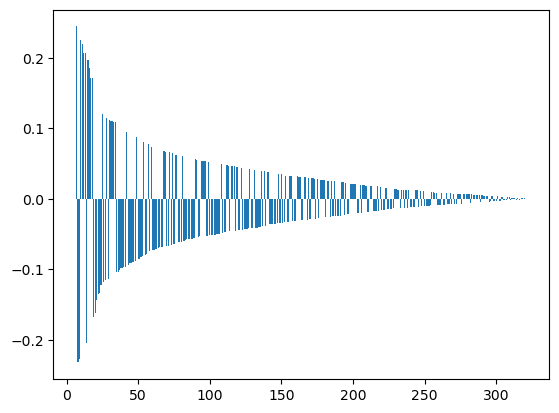

In [22]:
# sort the correlations according to the absolute value
# then plot in a bar chart
import matplotlib.pyplot as plt
sorted_correlations = np.argsort(np.abs(correlations))
sorted_correlations = sorted_correlations[::-1]

plt.bar(range(len(sorted_correlations)), np.array(correlations)[sorted_correlations])
plt.show()

In [23]:
# print all features that have a (absolute) correlation greater than 0.1

most_correlated_features = []
for i in sorted_correlations:
    if np.abs(correlations[i]) > 0.1:
        most_correlated_features.append(features[i])
        nan_ratio = np.isnan(x_train[:, i]).mean()
        print(f"{features[i]}: correlation = {correlations[i]}, NaN ratio = {nan_ratio}")



GENHLTH: correlation = 0.24426949162996098, NaN ratio = 6.095052341261981e-06
LADULT: correlation = -0.2321726094326961, NaN ratio = 0.9999024791625398
CVDASPRN: correlation = -0.22766242918247137, NaN ratio = 0.9571944474073171
_AGE80: correlation = 0.2245474143266388, NaN ratio = 0.0
_AGEG5YR: correlation = 0.21900688187283066, NaN ratio = 0.0
EMPLOY1: correlation = 0.2071861434970774, NaN ratio = 0.0
_AGE_G: correlation = 0.20687285866885402, NaN ratio = 0.0
BPHIGH4: correlation = -0.20450352324261958, NaN ratio = 3.0475261706309903e-06
_HCVU651: correlation = 0.19642429934200228, NaN ratio = 0.0
_AGE65YR: correlation = 0.1852452016611347, NaN ratio = 0.0
_RFHLTH: correlation = 0.1715992514790009, NaN ratio = 0.0
_RFHYPE5: correlation = 0.17131942944502954, NaN ratio = 0.0
_DRDXAR1: correlation = -0.16836574235532828, NaN ratio = 0.005738491779298155
DIABETE3: correlation = -0.16134358652044806, NaN ratio = 1.523763085315495e-05
DRADVISE: correlation = -0.14308740484348803, NaN rati

In [28]:
# print 10 first values for feature _AGE80
feature_index = np.where(features == "_AGE80")[0][0]
print(x_train[:10, feature_index])
feature_index = np.where(features == "_AGEG5YR")[0][0]
print(x_train[:10, feature_index])

[57. 57. 65. 65. 61. 59. 80. 80. 55. 59.]
[ 8.  8. 10. 10. 14.  8. 13. 13.  8.  8.]


In [24]:
# discard the features that have a nan ratio greater than 0.05 from most_correlated_features

filtered_features = []
for feature in most_correlated_features:
    i = np.where(features == feature)[0][0]
    nan_ratio = np.isnan(x_train[:, i]).mean()
    if nan_ratio <= 0.05:
        filtered_features.append(feature)
        print(f"{features[i]}: correlation = {correlations[i]}")



GENHLTH: correlation = 0.24426949162996098
_AGE80: correlation = 0.2245474143266388
_AGEG5YR: correlation = 0.21900688187283066
EMPLOY1: correlation = 0.2071861434970774
_AGE_G: correlation = 0.20687285866885402
BPHIGH4: correlation = -0.20450352324261958
_HCVU651: correlation = 0.19642429934200228
_AGE65YR: correlation = 0.1852452016611347
_RFHLTH: correlation = 0.1715992514790009
_RFHYPE5: correlation = 0.17131942944502954
_DRDXAR1: correlation = -0.16836574235532828
DIABETE3: correlation = -0.16134358652044806
USEEQUIP: correlation = -0.13477203170842295
DIFFWALK: correlation = -0.1343241153720408
HAVARTH3: correlation = -0.12198978714804676
QLACTLM2: correlation = -0.11468609308205917
CHILDREN: correlation = 0.11409425162657601
INTERNET: correlation = 0.10863738416807737
CVDSTRK3: correlation = -0.10126552092464387


In [41]:
x_train_filtered = x_train[:, [np.where(features == feature)[0][0] for feature in filtered_features]]
# discard all rows that contain a nan value in x_train_filtered
# Filtered features in the same order as x_train_filtered
kept_features = filtered_features  # Directly use filtered_features

# Discard all rows that contain a nan value in x_train_filtered
mask = np.isnan(x_train_filtered).any(axis=1)
x_train_filtered = x_train_filtered[~mask]

# Print shape of filtered data
print(x_train_filtered.shape)

# List of kept features
print(kept_features)

(317160, 19)
['GENHLTH', '_AGE80', '_AGEG5YR', 'EMPLOY1', '_AGE_G', 'BPHIGH4', '_HCVU651', '_AGE65YR', '_RFHLTH', '_RFHYPE5', '_DRDXAR1', 'DIABETE3', 'USEEQUIP', 'DIFFWALK', 'HAVARTH3', 'QLACTLM2', 'CHILDREN', 'INTERNET', 'CVDSTRK3']


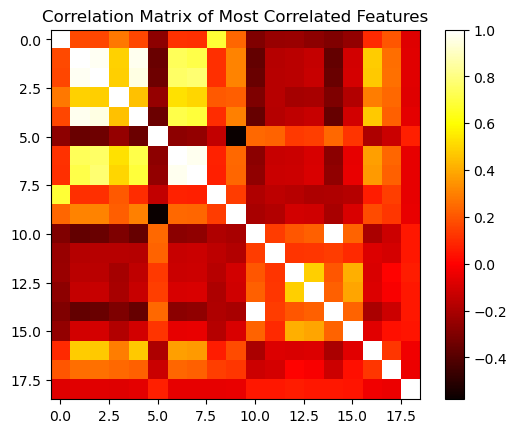

In [37]:
# calculate the correlation between most_correlated_features in x_train


# calculate the correlation between most_correlated_features in x_train_filtered

correlation_matrix = np.corrcoef(x_train_filtered.T)


# Plot the correlation matrix
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Most Correlated Features')
plt.show()

## Test a random forest classifier

In [53]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Split x_train and y_train into train and test sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_train[:, 1:],  # Exclude the first column of x_train
    y_train[:, 1],   # Target is the second column of y_train
    test_size=0.2,   # Set aside 20% of the data for testing
    random_state=42  # Ensure reproducibility
)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier on the training data
rf.fit(x_train_split, y_train_split)

# Print the feature importances
print("Feature Importances:", rf.feature_importances_)

# Predict on the test set
y_pred = rf.predict(x_test_split)

# Compute and print precision
precision = precision_score(y_test_split, y_pred)
print("Precision:", precision)


Feature Importances: [9.67112865e-03 7.52644561e-03 1.22848538e-02 7.23717208e-03
 1.04098562e-02 4.79413539e-04 7.87345834e-04 1.15869393e-02
 1.13148257e-02 0.00000000e+00 7.38648253e-06 0.00000000e+00
 0.00000000e+00 2.49720129e-03 0.00000000e+00 3.56682296e-03
 3.08075945e-03 3.19189417e-03 0.00000000e+00 0.00000000e+00
 1.35324324e-03 1.74853361e-05 0.00000000e+00 5.89222045e-04
 1.49462713e-03 2.90550536e-03 1.79403350e-02 7.16367030e-03
 4.53945486e-03 7.18174873e-03 7.58809928e-04 2.61773813e-03
 1.61606078e-03 2.84575292e-03 6.70436817e-03 7.07643185e-03
 6.52679480e-04 2.91624477e-03 7.18282829e-03 1.24766838e-02
 1.49027338e-03 1.46734722e-03 1.91834064e-03 1.91075163e-03
 7.69838463e-03 2.58312710e-03 2.09295472e-03 3.65969424e-03
 5.00273693e-03 7.67278062e-03 4.89098291e-03 3.84672737e-03
 4.74676077e-03 2.46351662e-03 1.32768386e-03 7.48462115e-04
 2.22835000e-03 3.10125285e-03 1.08439581e-02 1.42085699e-03
 7.29345302e-03 2.40845509e-03 1.03654652e-02 8.87462993e-03
 2.

In [60]:
# sort features[1:] by feature_importances_
sorted_features = np.argsort(rf.feature_importances_)[::-1]

# print the 10 most important features
for i in range(10):
    print(features[sorted_features[i] + 1], rf.feature_importances_[sorted_features[i]])

GENHLTH 0.017940334987778875
MAXVO2_ 0.016119320606601366
FC60_ 0.014162045716093748
_BMI5 0.013684015540196041
_LLCPWT 0.012984714919223983
_VEGESUM 0.012713381965382022
_AGE80 0.012626069402297681
WTKG3 0.01258006090323557
CVDSTRK3 0.012476683767899658
IDATE 0.012284853786696774
